In [3]:
import numpy as np
import pandas as pd 

In [4]:
df_train = pd.read_csv("../input/credit-dset/train.csv")

C:\Users\mitta\AppData\Local\Temp\ipykernel_48804\403186247.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../input/credit-dset/train.csv")


In [6]:
# string -> no of months
def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    else : 
        parts = age_str.split(' and ')
        years = int(parts[0].split()[0])
        months = int(parts[1].split()[0])
        total_months = (years * 12) + months
        return total_months

In [ ]:

# Load your data (replace 'train.csv' with your actual file path)


# Display summary statistics
print(df_train.describe())


       Base_Salary_PerMonth  Total_Bank_Accounts  Total_Credit_Cards  \
count          67968.000000         80000.000000        80000.000000   
mean            4189.211406            17.046287           22.175438   
std             3181.371100           116.953761          128.083595   
min              303.645417            -1.000000            0.000000   
25%             1623.664167             4.000000            4.000000   
50%             3086.683333             6.000000            5.000000   
75%             5950.863333             7.000000            7.000000   
max            15204.633333          1798.000000         1499.000000   

       Rate_Of_Interest  Delay_from_due_date  Total_Credit_Enquiries  \
count      80000.000000         80000.000000            78451.000000   
mean          72.261350            21.081663               28.153115   
std          466.370837            14.855210              194.812201   
min            1.000000            -5.000000                0.0

ValueError: could not convert string to float: '0x522a'

In [4]:
loan_type_col = df_train['Loan_Type']
# dropping columns
df_train = df_train.drop(['Name','Loan_Type','ID'], axis=1)
# base salary -> number
df_train['Base_Salary_PerMonth'] = pd.to_numeric(df_train['Base_Salary_PerMonth'],downcast = 'float',errors = 'coerce')
# Total delayed payments (removing underscores if present) -> number
df_train['Total_Delayed_Payments'] = df_train['Total_Delayed_Payments'].str.replace(r'[^-0-9]', '', regex=True)
df_train['Total_Delayed_Payments'] = pd.to_numeric(df_train['Total_Delayed_Payments'],downcast = 'float',errors = 'coerce')
# credit history age -> number (to no of months)
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_to_months)
df_train['Credit_History_Age'] = pd.to_numeric(df_train['Credit_History_Age'],downcast = 'float',errors = 'coerce')
#age -> number
df_train['Age'] = df_train['Age'].str.replace(r'[^-0-9]', '', regex=True)
df_train['Age'] = pd.to_numeric(df_train['Age'],downcast = 'integer',errors = 'coerce')
#Income_annual -> number
df_train['Income_Annual'] = df_train['Income_Annual'].str.replace(r'[^-.0-9]', '', regex=True)
df_train['Income_Annual'] = pd.to_numeric(df_train['Income_Annual'],downcast = 'float',errors = 'coerce')
#Total_Current_Loans -> number
df_train['Total_Current_Loans'] = df_train['Total_Current_Loans'].str.replace(r'[^-0-9]', '', regex=True)
df_train['Total_Current_Loans'] = pd.to_numeric(df_train['Total_Current_Loans'],downcast = 'integer',errors = 'coerce')
#Current_Debt_Outstanding -> number
df_train['Current_Debt_Outstanding'] = df_train['Current_Debt_Outstanding'].str.replace(r'[^-.0-9]', '', regex=True)
df_train['Current_Debt_Outstanding'] = pd.to_numeric(df_train['Current_Debt_Outstanding'],downcast = 'float',errors = 'coerce')
#Credit_Limit -> number
df_train['Credit_Limit'] = pd.to_numeric(df_train['Credit_Limit'],downcast = 'float',errors = 'coerce')
#Monthly_Balance -> number
df_train['Monthly_Balance'] = pd.to_numeric(df_train['Monthly_Balance'],downcast = 'float',errors = 'coerce')
loan_type_col.isna().sum()

9157

In [5]:
print(df_train.info(),end = "\n\n")
col = "Credit_Limit" #Monthly_Balance
print(df_train[pd.to_numeric(df_train[col],downcast = 'float', errors="coerce").isna()][col].value_counts())
#print(df_train[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  object 
 2   Age                       80000 non-null  int16  
 3   Number                    80000 non-null  object 
 4   Profession                80000 non-null  object 
 5   Income_Annual             80000 non-null  float64
 6   Base_Salary_PerMonth      67968 non-null  float32
 7   Total_Bank_Accounts       80000 non-null  int64  
 8   Total_Credit_Cards        80000 non-null  int64  
 9   Rate_Of_Interest          80000 non-null  int64  
 10  Total_Current_Loans       80000 non-null  int16  
 11  Delay_from_due_date       80000 non-null  int64  
 12  Total_Delayed_Payments    74405 non-null  float32
 13  Credit_Limit              78309 non-null  float32
 14  Total_

In [6]:
df_train.drop_duplicates(inplace=True)
print(df_train.isna().sum().to_string())
print(df_train.shape)

Customer_ID                     0
Month                           0
Age                             0
Number                          0
Profession                      0
Income_Annual                   0
Base_Salary_PerMonth        12032
Total_Bank_Accounts             0
Total_Credit_Cards              0
Rate_Of_Interest                0
Total_Current_Loans             0
Delay_from_due_date             0
Total_Delayed_Payments       5595
Credit_Limit                 1691
Total_Credit_Enquiries       1549
Credit_Mix                      0
Current_Debt_Outstanding        0
Ratio_Credit_Utilization        0
Credit_History_Age           7240
Payment_of_Min_Amount           0
Per_Month_EMI                   0
Monthly_Investment           3605
Payment_Behaviour               0
Monthly_Balance               957
Credit_Score                    0
(80000, 25)


In [7]:
df_train["Credit_Limit"] = df_train.groupby("Customer_ID")["Credit_Limit"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill")
)
df_train['Credit_Limit'].isna().sum()

/tmp/ipykernel_17/2762047474.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method="ffill").fillna(method="bfill")


0

In [8]:
unknown_min_pay_repl = df_train['Payment_of_Min_Amount'].mode()[0]
df_train['Payment_of_Min_Amount'] = df_train.groupby("Customer_ID")['Payment_of_Min_Amount'].transform(
    lambda x: x.where(x != "NM", x[x != "NM"].mode().get(0, unknown_min_pay_repl))
)
df_train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    47543
No     32457
Name: count, dtype: int64

In [9]:
unknown_mix_repl = df_train['Credit_Mix'].mode()[0]
df_train['Credit_Mix'] = df_train.groupby("Customer_ID")['Credit_Mix'].transform(
    lambda x: x.where(x != "_", x[x != "_"].mode().get(0, unknown_mix_repl))
)
df_train['Credit_Mix'].value_counts()

Credit_Mix
Standard    36699
Good        24275
Bad         19026
Name: count, dtype: int64

In [10]:
unknown_prof_repl = 'Lawyer'
df_train['Profession'] = df_train.groupby("Customer_ID")['Profession'].transform(
    lambda x: x.where(x != "_______", x[x != "_______"].mode().get(0, unknown_prof_repl))
)
df_train['Profession'].value_counts()

Profession
Lawyer           5692
Engineer         5497
Mechanic         5493
Architect        5479
Scientist        5394
Accountant       5389
Media_Manager    5363
Teacher          5344
Developer        5343
Journalist       5281
Entrepreneur     5235
Doctor           5214
Manager          5172
Musician         5065
Writer           5039
Name: count, dtype: int64

In [11]:
unknown_number_repl = '000-00-0000'
df_train['Number'] = df_train.groupby("Customer_ID")['Number'].transform(
    lambda x: x.where(x != "#F%$D@*&8", x[x != "#F%$D@*&8"].mode().get(0, unknown_number_repl))
)
df_train['Number'].value_counts()

Number
865-33-5347    8
808-71-5249    8
676-82-0055    8
430-15-0729    8
309-02-3479    8
              ..
702-39-1597    2
346-46-1263    2
837-45-0195    2
761-53-5627    2
789-15-7049    2
Name: count, Length: 12500, dtype: int64

In [12]:
unknown_behavior_repl = df_train['Payment_Behaviour'].mode()[0]
df_train['Payment_Behaviour'] = df_train.groupby("Customer_ID")['Payment_Behaviour'].transform(
    lambda x: x.where(x != "!@9#%8", x[x != "!@9#%8"].mode().get(0, unknown_behavior_repl))
)
df_train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      22144
High_spent_Medium_value_payments    15452
High_spent_Large_value_payments     12375
Low_spent_Medium_value_payments     11724
High_spent_Small_value_payments      9564
Low_spent_Large_value_payments       8741
Name: count, dtype: int64

In [13]:
null_percentages=(df_train.isna().sum()/df_train.shape[0])*100
null_cols = null_percentages.loc[null_percentages > 0]
null_cols

Base_Salary_PerMonth      15.04000
Total_Delayed_Payments     6.99375
Total_Credit_Enquiries     1.93625
Credit_History_Age         9.05000
Monthly_Investment         4.50625
Monthly_Balance            1.19625
dtype: float64

In [14]:
for col in null_cols.index:
    unknown_behavior_repl = df_train[col].mode()[0]
    df_train[col] = df_train.groupby("Customer_ID")[col].transform(
        lambda x: x.fillna(x[x.notna()].mode().get(0, unknown_behavior_repl))
    )
    print(f"{col} : {df_train[col].isna().sum()}")

Base_Salary_PerMonth : 0
Total_Delayed_Payments : 0
Total_Credit_Enquiries : 0
Credit_History_Age : 0
Monthly_Investment : 0
Monthly_Balance : 0


In [15]:
rows_to_drop = null_cols.loc[null_cols < 5]
df_train.dropna(subset = rows_to_drop.keys(),inplace=True,how='any',axis=0)
print(df_train.isna().sum().to_string())
print(df_train.shape)

Customer_ID                 0
Month                       0
Age                         0
Number                      0
Profession                  0
Income_Annual               0
Base_Salary_PerMonth        0
Total_Bank_Accounts         0
Total_Credit_Cards          0
Rate_Of_Interest            0
Total_Current_Loans         0
Delay_from_due_date         0
Total_Delayed_Payments      0
Credit_Limit                0
Total_Credit_Enquiries      0
Credit_Mix                  0
Current_Debt_Outstanding    0
Ratio_Credit_Utilization    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Per_Month_EMI               0
Monthly_Investment          0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
(80000, 25)


In [16]:
columns_to_drop = null_cols.loc[null_cols > 40]
df_train.drop(columns = columns_to_drop.keys(),inplace = True)
df_train.drop_duplicates(inplace=True)
print(df_train.shape)

(80000, 25)


In [17]:
null_percentages=(df_train.isna().sum()/df_train.shape[0])*100
null_cols = null_percentages.loc[null_percentages > 0]
print(null_cols,end = "\n\n")
col_impute = null_cols.loc[(null_cols >= 5) & (null_cols < 40)]
for column in col_impute.keys():
    central_tend = df_train[column].mean()
    df_train[column] = df_train[column].fillna(central_tend)

Series([], dtype: float64)



In [18]:
df_train['Monthly_Investment'] = df_train['Monthly_Investment'].str.replace(r'[^-.0-9]', '', regex=True)
df_train['Monthly_Investment'] = pd.to_numeric(df_train['Monthly_Investment'],downcast = 'float',errors = 'coerce')
df_train = df_train.drop(['Customer_ID'], axis=1)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  object 
 1   Age                       80000 non-null  int16  
 2   Number                    80000 non-null  object 
 3   Profession                80000 non-null  object 
 4   Income_Annual             80000 non-null  float64
 5   Base_Salary_PerMonth      80000 non-null  float32
 6   Total_Bank_Accounts       80000 non-null  int64  
 7   Total_Credit_Cards        80000 non-null  int64  
 8   Rate_Of_Interest          80000 non-null  int64  
 9   Total_Current_Loans       80000 non-null  int16  
 10  Delay_from_due_date       80000 non-null  int64  
 11  Total_Delayed_Payments    80000 non-null  float32
 12  Credit_Limit              80000 non-null  float32
 13  Total_Credit_Enquiries    80000 non-null  float64
 14  Credit

In [19]:
df_train.to_csv('clean_trained.csv',index = False)

In [20]:
df_test = pd.read_csv('../input/credit-dset/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Customer_ID               20000 non-null  object 
 2   Month                     20000 non-null  object 
 3   Name                      18044 non-null  object 
 4   Age                       20000 non-null  object 
 5   Number                    20000 non-null  object 
 6   Profession                20000 non-null  object 
 7   Income_Annual             20000 non-null  object 
 8   Base_Salary_PerMonth      17030 non-null  float64
 9   Total_Bank_Accounts       20000 non-null  int64  
 10  Total_Credit_Cards        20000 non-null  int64  
 11  Rate_Of_Interest          20000 non-null  int64  
 12  Total_Current_Loans       20000 non-null  object 
 13  Loan_Type                 17749 non-null  object 
 14  Delay_

In [21]:
# loan_type_col = df_test['Loan_Type']
# dropping columns
df_test = df_test.drop(['Name','Loan_Type'], axis=1)
# base salary -> number
df_test['Base_Salary_PerMonth'] = pd.to_numeric(df_test['Base_Salary_PerMonth'],downcast = 'float',errors = 'coerce')
# Total delayed payments (removing underscores if present) -> number
df_test['Total_Delayed_Payments'] = df_test['Total_Delayed_Payments'].str.replace(r'[^-0-9]', '', regex=True)
df_test['Total_Delayed_Payments'] = pd.to_numeric(df_test['Total_Delayed_Payments'],downcast = 'float',errors = 'coerce')
# credit history age -> number (to no of months)
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].apply(convert_to_months)
df_test['Credit_History_Age'] = pd.to_numeric(df_test['Credit_History_Age'],downcast = 'float',errors = 'coerce')
#age -> number
df_test['Age'] = df_test['Age'].str.replace(r'[^-0-9]', '', regex=True)
df_test['Age'] = pd.to_numeric(df_test['Age'],downcast = 'integer',errors = 'coerce')
#Income_annual -> number
df_test['Income_Annual'] = df_test['Income_Annual'].str.replace(r'[^-.0-9]', '', regex=True)
df_test['Income_Annual'] = pd.to_numeric(df_test['Income_Annual'],downcast = 'float',errors = 'coerce')
#Total_Current_Loans -> number
df_test['Total_Current_Loans'] = df_test['Total_Current_Loans'].str.replace(r'[^-0-9]', '', regex=True)
df_test['Total_Current_Loans'] = pd.to_numeric(df_test['Total_Current_Loans'],downcast = 'integer',errors = 'coerce')
#Current_Debt_Outstanding -> number
df_test['Current_Debt_Outstanding'] = df_test['Current_Debt_Outstanding'].str.replace(r'[^-.0-9]', '', regex=True)
df_test['Current_Debt_Outstanding'] = pd.to_numeric(df_test['Current_Debt_Outstanding'],downcast = 'float',errors = 'coerce')
#Credit_Limit -> number
df_test['Credit_Limit'] = pd.to_numeric(df_test['Credit_Limit'],downcast = 'float',errors = 'coerce')
#Monthly_Balance -> number
df_test['Monthly_Balance'] = pd.to_numeric(df_test['Monthly_Balance'],downcast = 'float',errors = 'coerce')
#Monthlu_invetment
df_test['Monthly_Investment'] = df_test['Monthly_Investment'].str.replace(r'[^-.0-9]', '', regex=True)
df_test['Monthly_Investment'] = pd.to_numeric(df_test['Monthly_Investment'],downcast = 'float',errors = 'coerce')

In [22]:
print(df_test.isna().sum().to_string(),end = "\n\n")
print(df_test.info())

ID                             0
Customer_ID                    0
Month                          0
Age                            0
Number                         0
Profession                     0
Income_Annual                  0
Base_Salary_PerMonth        2970
Total_Bank_Accounts            0
Total_Credit_Cards             0
Rate_Of_Interest               0
Total_Current_Loans            0
Delay_from_due_date            0
Total_Delayed_Payments      1407
Credit_Limit                 400
Total_Credit_Enquiries       416
Credit_Mix                     0
Current_Debt_Outstanding       0
Ratio_Credit_Utilization       0
Credit_History_Age          1790
Payment_of_Min_Amount          0
Per_Month_EMI                  0
Monthly_Investment           874
Payment_Behaviour              0
Monthly_Balance              252

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  -----

In [23]:
col = "Payment_Behaviour" #Monthly_Balance
#print(df_test[pd.to_numeric(df_test[col],downcast = 'float', errors="coerce").isna()][col].value_counts())
print(df_test[col].value_counts())

Payment_Behaviour
Low_spent_Small_value_payments      5043
High_spent_Medium_value_payments    3483
High_spent_Large_value_payments     2790
Low_spent_Medium_value_payments     2760
High_spent_Small_value_payments     2306
Low_spent_Large_value_payments      2116
!@9#%8                              1502
Name: count, dtype: int64


In [24]:
# unknown_base_repl_test = df_test['Base_Salary_PerMonth'].mean()
base_sal_mean_test = df_test['Base_Salary_PerMonth'].mean()
df_test['Base_Salary_PerMonth'] = df_test.groupby("Customer_ID")['Base_Salary_PerMonth'].transform(
    lambda x: x.fillna(x.mean() if not x.mean() != x.mean() else base_sal_mean_test)#.get(0, unknown_min_pay_repl)
)
df_test['Base_Salary_PerMonth'].isna().sum()

0

In [25]:
base_sal_mean_test = df_test['Total_Delayed_Payments'].mode()[0]
df_test['Total_Delayed_Payments'] = df_test.groupby("Customer_ID")['Total_Delayed_Payments'].transform(
    lambda x: x.fillna(x[x.notna()].mode().get(0, base_sal_mean_test))
)
df_test['Total_Delayed_Payments'].isna().sum()

0

In [26]:
uk = df_test['Credit_Limit'].mean()
df_test["Credit_Limit"] = df_test.groupby("Customer_ID")["Credit_Limit"].transform(
        lambda x: x.fillna(x[x.notna()].mode().get(0, uk))
)
df_test['Credit_Limit'].isna().sum()

0

In [27]:
base_sal_mean_test = df_test['Total_Credit_Enquiries'].mean()
df_test['Total_Credit_Enquiries'] = df_test.groupby("Customer_ID")['Total_Credit_Enquiries'].transform(
    lambda x: x.fillna(x[x.notna()].mode().get(0, base_sal_mean_test))
)
df_test['Total_Credit_Enquiries'].isna().sum()

0

In [28]:
base_sal_mean_test = df_test['Credit_History_Age'].mean()
df_test['Credit_History_Age'] = df_test.groupby("Customer_ID")['Credit_History_Age'].transform(
    lambda x: x.fillna(x[x.notna()].mode().get(0, base_sal_mean_test))
)
df_test['Credit_History_Age'].isna().sum()

0

In [29]:
base_sal_mean_test = df_test['Monthly_Investment'].mean()
df_test['Monthly_Investment'] = df_test.groupby("Customer_ID")['Monthly_Investment'].transform(
    lambda x: x.fillna(x[x.notna()].mode().get(0, base_sal_mean_test))
)
df_test['Monthly_Investment'].isna().sum()

0

In [30]:
base_sal_mean_test = df_test['Monthly_Balance'].mean()
df_test['Monthly_Balance'] = df_test.groupby("Customer_ID")['Monthly_Balance'].transform(
    lambda x: x.fillna(x[x.notna()].mode().get(0, base_sal_mean_test))
)
df_test['Monthly_Balance'].isna().sum()

0

In [31]:
unknown_prof_repl = 'Lawyer'
df_test['Profession'] = df_test.groupby("Customer_ID")['Profession'].transform(
    lambda x: x.where(x != "_______", x[x != "_______"].mode().get(0, unknown_prof_repl))
)
df_train['Profession'].value_counts()

Profession
Lawyer           5692
Engineer         5497
Mechanic         5493
Architect        5479
Scientist        5394
Accountant       5389
Media_Manager    5363
Teacher          5344
Developer        5343
Journalist       5281
Entrepreneur     5235
Doctor           5214
Manager          5172
Musician         5065
Writer           5039
Name: count, dtype: int64

In [32]:
unknown_number_repl = '000-00-0000'
df_test['Number'] = df_test.groupby("Customer_ID")['Number'].transform(
    lambda x: x.where(x != "#F%$D@*&8", x[x != "#F%$D@*&8"].mode().get(0, unknown_number_repl))
)
df_train['Number'].value_counts()

Number
865-33-5347    8
808-71-5249    8
676-82-0055    8
430-15-0729    8
309-02-3479    8
              ..
702-39-1597    2
346-46-1263    2
837-45-0195    2
761-53-5627    2
789-15-7049    2
Name: count, Length: 12500, dtype: int64

In [33]:
unknown_min_pay_repl = df_test['Payment_of_Min_Amount'].mode()[0]
df_test['Payment_of_Min_Amount'] = df_test.groupby("Customer_ID")['Payment_of_Min_Amount'].transform(
    lambda x: x.where(x != "NM", x[x != "NM"].mode().get(0, unknown_min_pay_repl))
)
df_test['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    12153
No      7847
Name: count, dtype: int64

In [34]:
unknown_behavior_repl = df_test['Payment_Behaviour'].mode()[0]
df_test['Payment_Behaviour'] = df_test.groupby("Customer_ID")['Payment_Behaviour'].transform(
    lambda x: x.where(x != "!@9#%8", x[x != "!@9#%8"].mode().get(0, unknown_behavior_repl))
)
df_test['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      5603
High_spent_Medium_value_payments    3741
High_spent_Large_value_payments     3062
Low_spent_Medium_value_payments     2892
High_spent_Small_value_payments     2465
Low_spent_Large_value_payments      2237
Name: count, dtype: int64

0
0
int64


C:\Users\mitta\AppData\Local\Temp\ipykernel_48804\953777296.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['rate_of_interest'] < 500]['rate_of_interest'], shade=True, color="purple")


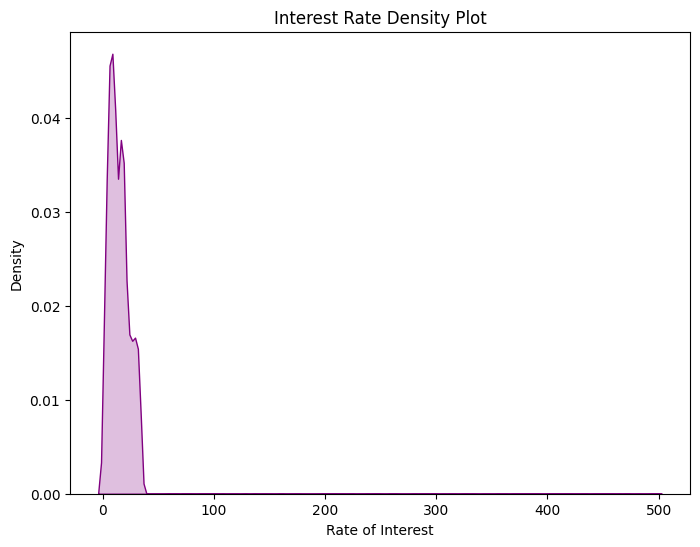

C:\Users\mitta\AppData\Local\Temp\ipykernel_48804\953777296.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['total_bank_accounts'] < 80]['total_bank_accounts'], shade=True, color="purple")


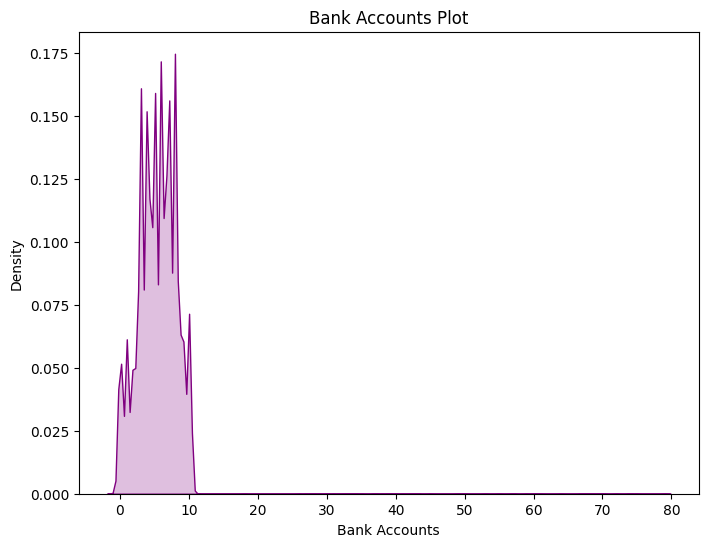

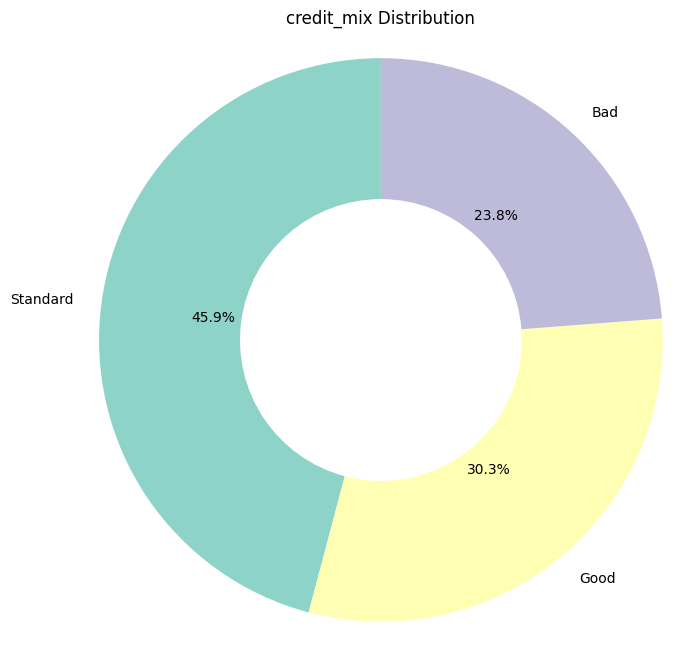

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
df_train["total_bank_accounts"].value_counts().sort_index().head(20) 

print(df_train['rate_of_interest'].isnull().sum())

print(df_train["total_bank_accounts"].isnull().sum())
print(df_train['rate_of_interest'].dtype)



plt.figure(figsize=(8, 6))
sns.kdeplot(df_train[df_train['rate_of_interest'] < 500]['rate_of_interest'], shade=True, color="purple")
plt.title("Interest Rate Density Plot")
plt.xlabel("Rate of Interest")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df_train[df_train['total_bank_accounts'] < 80]['total_bank_accounts'], shade=True, color="purple")
plt.title("Bank Accounts Plot")
plt.xlabel("Bank Accounts")
plt.show()


df_train[pd.to_numeric(df_train["total_current_loans"], errors="coerce").isna()]["total_current_loans"].head(20)


# df_train["total_current_loans"] = df_train["total_current_loans"].str.strip("_")

df_train["total_current_loans"] = pd.to_numeric(df_train["total_current_loans"], downcast="integer")

df_train["total_current_loans"].dtype

df_train["total_current_loans"].value_counts().sort_index().head(20)

df_train.groupby("customer_id")["loan_type"].value_counts().sample(20)

df_train.groupby("customer_id")["loan_type"].value_counts().value_counts()


df_train.credit_mix.value_counts()

df_train[["customer_id", "credit_mix"]].head(20)

df_train.loc[df_train["credit_mix"] == "_", "credit_mix"] = pd.NA

df_train["credit_mix"] = df_train.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

df_train["credit_mix"].isna().sum()
# df_train.rate_of_interest.value_counts().sort_index().head(20)
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_train, y="rate_of_interest", palette="Set3")
# plt.title("interest_rate Distribution")
# plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df_train["credit_mix"].value_counts(),
        labels=df_train["credit_mix"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("credit_mix Distribution")
plt.axis('equal')
plt.show()

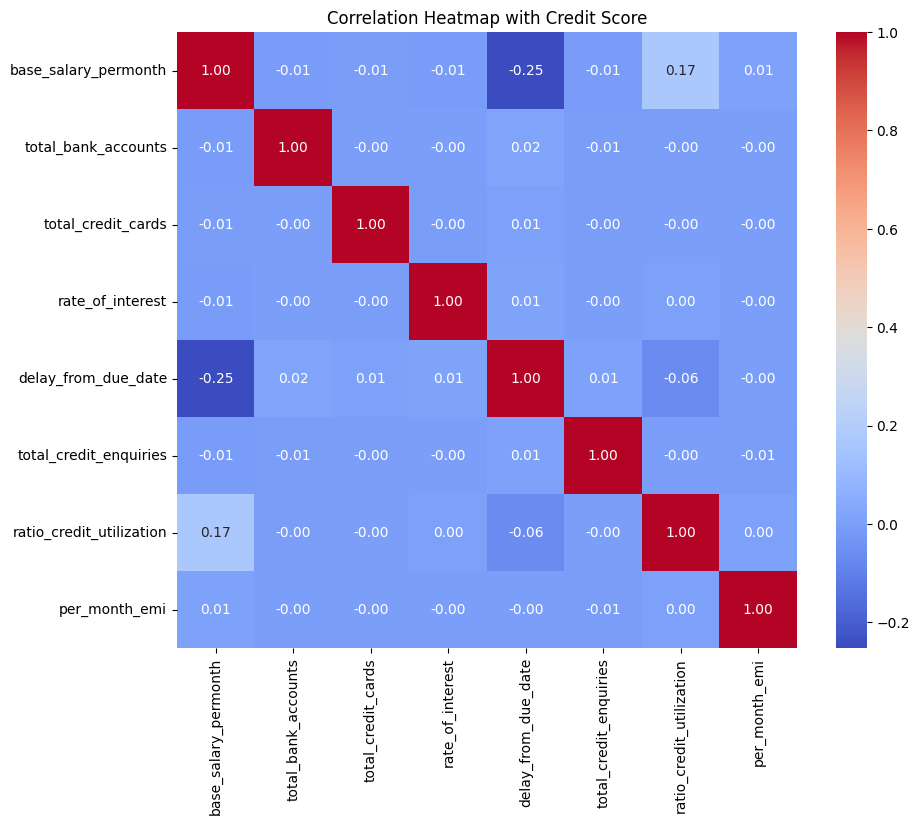

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        80000 non-null  object 
 1   customer_id               80000 non-null  object 
 2   month                     80000 non-null  object 
 3   name                      71971 non-null  object 
 4   age                       80000 non-null  object 
 5   number                    80000 non-null  object 
 6   profession                80000 non-null  object 
 7   income_annual             80000 non-null  object 
 8   base_salary_permonth      67968 non-null  float64
 9   total_bank_accounts       80000 non-null  int64  
 10  total_credit_cards        80000 non-null  int64  
 11  rate_of_interest          80000 non-null  int64  
 12  total_current_loans       80000 non-null  object 
 13  loan_type                 70843 non-null  object 
 14  delay_

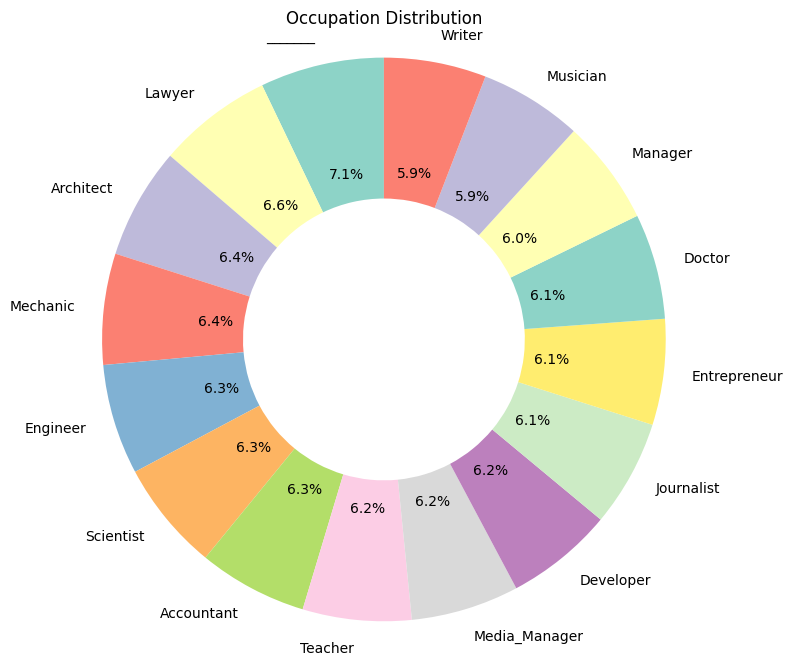

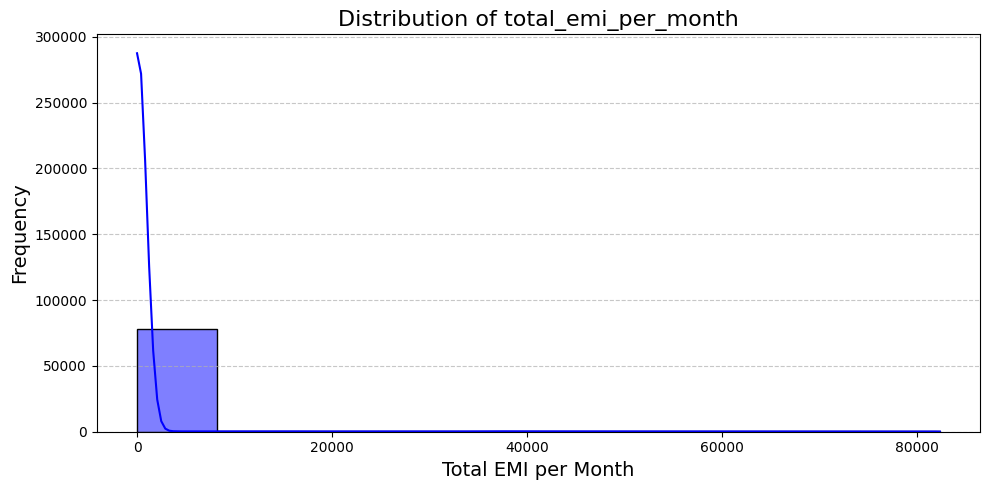

customer_id  total_bank_accounts  total_credit_cards
CUS_0x1000   6                    5                     6
CUS_0x1009   6                    5                     6
CUS_0x100b   1                    4                     4
CUS_0x1011   3                    3                     8
CUS_0x1013   3                    3                     6
CUS_0x1015   7                    4                     6
CUS_0x1018   7                    7                     5
CUS_0x1026   2                    6                     8
CUS_0x102d   5                    3                     5
             1000                 3                     1
CUS_0x102e   8                    4                     7
CUS_0x1032   4                    7                     6
CUS_0x1037   5                    4                     6
CUS_0x1038   3                    4                     6
CUS_0x103e   4                    6                     8
CUS_0x1041   8                    8                     6
CUS_0x1044   2     

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_df =df_train.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

df_train.columns = [column.lower() for column in df_train.columns]
df_train.info()

df_train["month"].value_counts()
df_train.groupby(["customer_id"]).age.value_counts().head(20)
df_train.age.value_counts().sort_index().head(20)
#the highest value after 56 is 95, and it occurs only 3 times. This is erroneous data.
print(df_train.customer_id.value_counts())

df_train.profession.value_counts()
df_train.groupby("customer_id")["profession"].value_counts().head(30)
plt.figure(figsize=(8, 8))
plt.pie(df_train["profession"].value_counts(),
        labels=df_train["profession"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Occupation Distribution")
plt.axis('equal')
plt.show()
df_train[pd.to_numeric(df_train["income_annual"],
                  errors="coerce").isna()]["income_annual"].head(20)

# df_train.groupby("customer_id")["income_annual"].value_counts().value_counts()
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_train, y="income_annual", palette="Set3",legend=False)
# plt.title("Annual_Income Distribution")
# plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x="per_month_emi", bins=10, kde=True, color='blue')

plt.title('Distribution of total_emi_per_month', fontsize=16)
plt.xlabel('Total EMI per Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




df_train.groupby(["customer_id"])[["total_bank_accounts",
                              "total_credit_cards"]].value_counts().head(20)




# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df_train, y="total_credit_cards", palette="Set3")
# plt.title("num_credit_card Distribution")
# plt.show()


In [35]:
unknown_mix_repl = df_test['Credit_Mix'].mode()[0]
df_test['Credit_Mix'] = df_test.groupby("Customer_ID")['Credit_Mix'].transform(
    lambda x: x.where(x != "_", x[x != "_"].mode().get(0, unknown_mix_repl))
)
df_test['Credit_Mix'].value_counts()

Credit_Mix
Standard    9833
Good        5739
Bad         4428
Name: count, dtype: int64

In [36]:
df_test = df_test.drop(['Customer_ID'], axis=1)
df_test.info()
df_test.to_csv('test_cleaned.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Month                     20000 non-null  object 
 2   Age                       20000 non-null  int16  
 3   Number                    20000 non-null  object 
 4   Profession                20000 non-null  object 
 5   Income_Annual             20000 non-null  float64
 6   Base_Salary_PerMonth      20000 non-null  float32
 7   Total_Bank_Accounts       20000 non-null  int64  
 8   Total_Credit_Cards        20000 non-null  int64  
 9   Rate_Of_Interest          20000 non-null  int64  
 10  Total_Current_Loans       20000 non-null  int16  
 11  Delay_from_due_date       20000 non-null  int64  
 12  Total_Delayed_Payments    20000 non-null  float32
 13  Credit_Limit              20000 non-null  float32
 14  Total_